In [1]:
from utils_for_supersinglets import *
from qiskit.converters import circuit_to_dag, dag_to_circuit

In [ ]:
qcs, results, infos = nontrival_construction_1(4, error_rate=1e-7)

Simulation failed and returned the following error message:
ERROR: Failed to load circuits: Duplicate key "density_matrix" in save instruction.
Simulation failed and returned the following error message:
ERROR: Failed to load circuits: Duplicate key "density_matrix" in save instruction.
Simulation failed and returned the following error message:
ERROR: Failed to load circuits: Duplicate key "density_matrix" in save instruction.
Simulation failed and returned the following error message:
ERROR: Failed to load circuits: Duplicate key "density_matrix" in save instruction.
Simulation failed and returned the following error message:
ERROR: Failed to load circuits: Duplicate key "density_matrix" in save instruction.
Simulation failed and returned the following error message:
ERROR: Failed to load circuits: Duplicate key "density_matrix" in save instruction.
Simulation failed and returned the following error message:
ERROR: Failed to load circuits: Duplicate key "density_matrix" in save instr

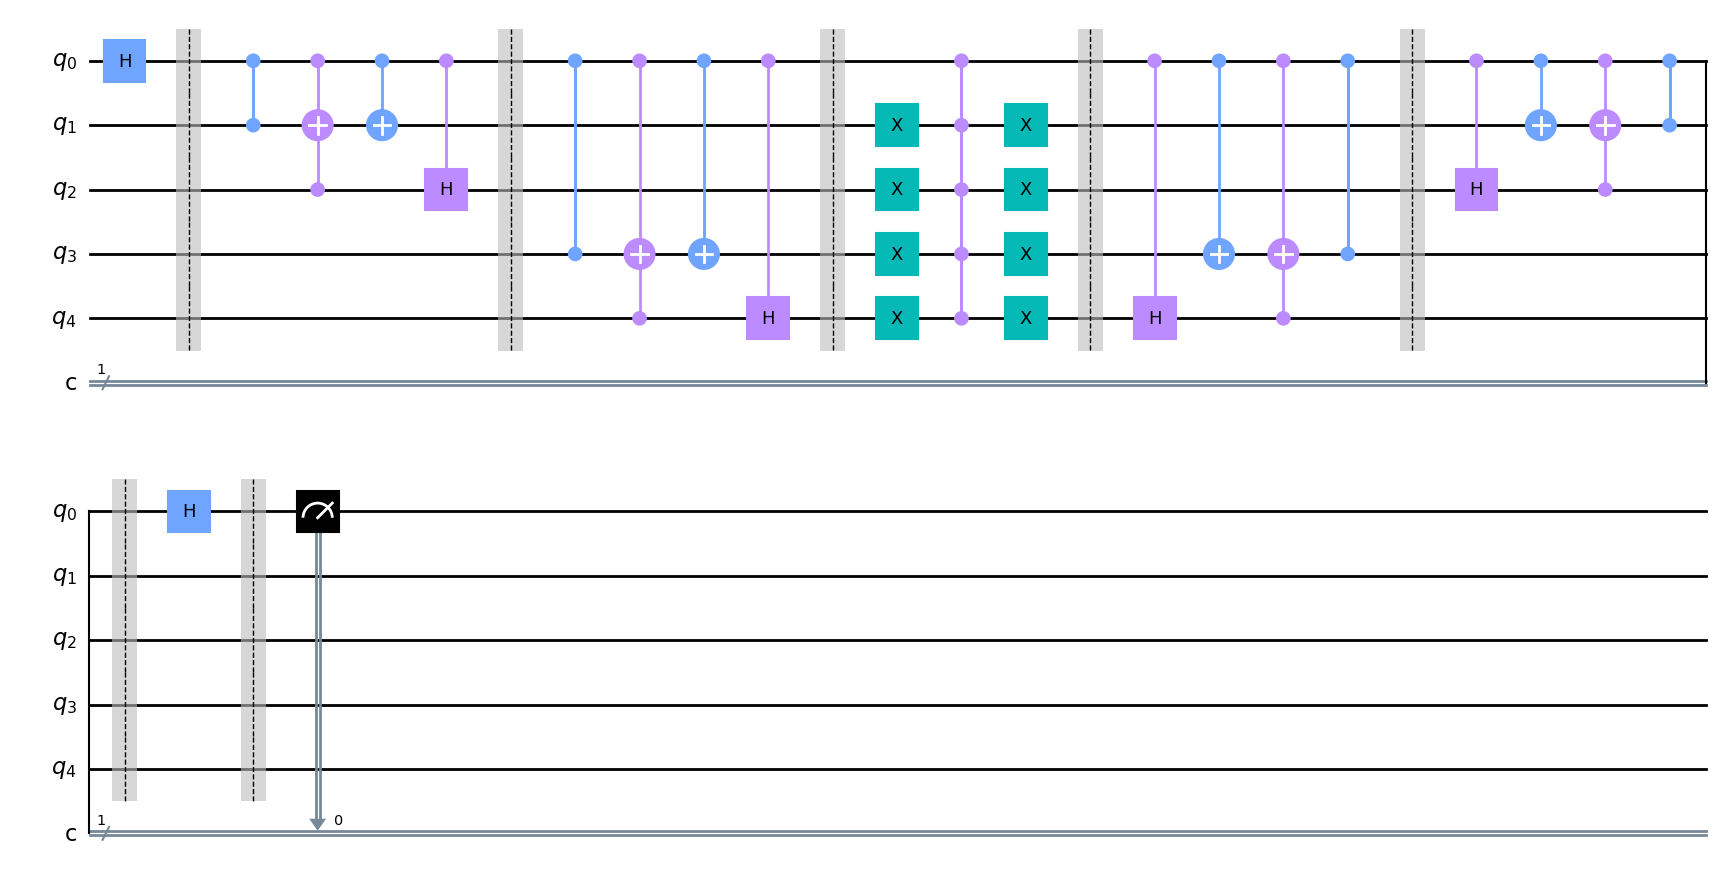

In [3]:
qcs[1].draw('mpl')

In [8]:
dag = circuit_to_dag(qcs[1])
qubit_number = qcs[1].num_qubits
decomposed_circuit = QuantumCircuit(qubit_number + 2)
for layer in dag.layers():
    layer_as_circuit = dag_to_circuit(layer['graph'])
    if 'ccx' in layer_as_circuit.count_ops().keys():
        # gate, qargs, cargs = layer_as_circuit.data[0]
        # # check the qubit index of the ccx gate
        # control_qubits = [q.index for q in qargs[:-1]]
        # target_qubit = qargs[-1].index
        # # decompose the ccx gate
        # decomposed_circuit = decomposed_circuit.compose(decompose_ccx(control_qubits, target_qubit))
        #decomposed_circuit = decomposed_circuit.compose(layer_as_circuit.decompose())
        decomposed_circuit = decomposed_circuit.compose(layer_as_circuit, qubits=range(qubit_number))
    elif 'ch' in layer_as_circuit.count_ops().keys():
        tmp_qc = QuantumCircuit(qubit_number)
        gate, qargs, cargs = layer_as_circuit.data[0]
        control_qubit = qargs[0].index
        target_qubit = qargs[1].index
        tmp_qc.ry(-np.pi/4, target_qubit)
        tmp_qc.cz(control_qubit, target_qubit)
        tmp_qc.ry(np.pi/4, target_qubit)
        decomposed_circuit = decomposed_circuit.compose(tmp_qc, qubits=range(qubit_number))
    elif 'measure' in layer_as_circuit.count_ops().keys():
        continue
    elif 'c4z' in layer_as_circuit.count_ops().keys():
        tmp_qc = QuantumCircuit(qubit_number + 2)
        tmp_qc.ccx(0,1, 5)
        tmp_qc.ccx(2,3, 6)
        tmp_qc.h(4)
        tmp_qc.ccx(5,6,4)
        tmp_qc.h(4)
        tmp_qc.ccx(2,3,6)
        tmp_qc.ccx(0,1,5)
        decomposed_circuit = decomposed_circuit.compose(tmp_qc, qubits=range(qubit_number + 2))
    else:
        decomposed_circuit = decomposed_circuit.compose(layer_as_circuit, qubits=range(qubit_number))

/var/folders/d5/z46p1gs16y75dvk_xd3lphdh0000gn/T/ipykernel_38623/1638371673.py:18: DeprecationWarning: The property ``qiskit.circuit.bit.Bit.index`` is deprecated as of qiskit-terra 0.17. It will be removed no earlier than 3 months after the release date. Instead, use :meth:`~qiskit.circuit.quantumcircuit.QuantumCircuit.find_bit` to find all the containing registers within a circuit and the index of the bit within the circuit.
  control_qubit = qargs[0].index
/var/folders/d5/z46p1gs16y75dvk_xd3lphdh0000gn/T/ipykernel_38623/1638371673.py:19: DeprecationWarning: The property ``qiskit.circuit.bit.Bit.index`` is deprecated as of qiskit-terra 0.17. It will be removed no earlier than 3 months after the release date. Instead, use :meth:`~qiskit.circuit.quantumcircuit.QuantumCircuit.find_bit` to find all the containing registers within a circuit and the index of the bit within the circuit.
  target_qubit = qargs[1].index


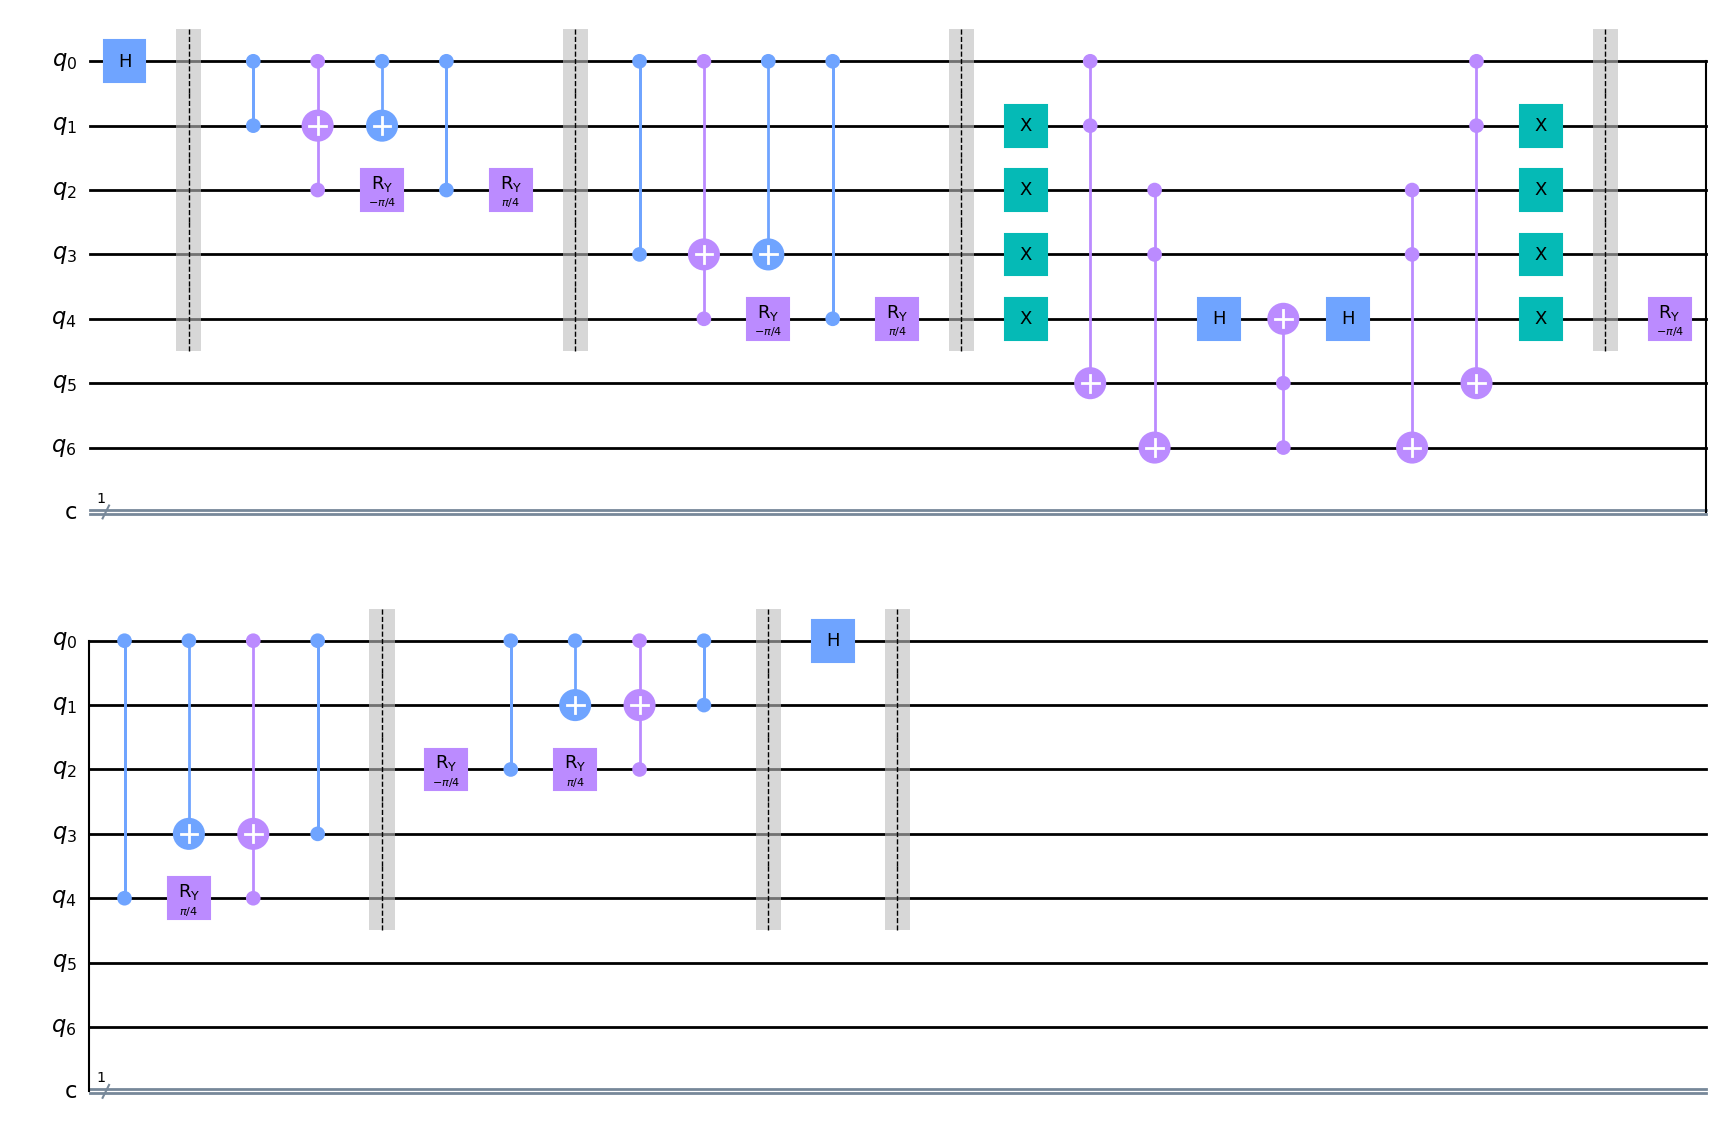

In [9]:
decomposed_circuit.draw('mpl')

In [10]:
correct_answers, _ = correct_answer(4)

现在的单量子比特逻辑门一般错误率低于0.03%，在这里按照最新的0.01%结果选取
双量子比特逻辑门的错误率一般低于0.5%，最新的结果中这个数据是0.1%，这里讨论[0.01%, 1%]的情况[1e-4,1e-3.9,1e-3.8,...,1e-3,...,1e-2]
量子态读取的错误率一般低于5%，这里讨论[0.1%, 10%]的情况，[1e-3,1e-2.9,1e-2.8,...,1e-2,...,1e-1]

In [16]:
data = [[-1 for i in range(21)] for j in range(21)]

In [29]:
import copy

two_qubit_error_rates = [10 ** (-4 + 0.1 * i) for i in range(21)]
measurement_error_rates = [10 ** (-3 + 0.1 * i) for i in range(21)]

for i in range(21):
    for j in range(21):
        current_circuit = copy.deepcopy(decomposed_circuit)

        try:
            fidelity = construct_u_k_plus_one_noisy(
                current_circuit,
                a_k_plus_one=[[1,3],[2,4]],
                state_index=1,
                correct_state=correct_answers[1],
                iter_time=1,
                single_qubit_error_rate=1e-4,
                two_qubit_error_rate=two_qubit_error_rates[i],
                measurement_error_rate=measurement_error_rates[j]
            )

            if fidelity is None:
                raise ValueError("Fidelity is None")

            data[i][j] = 1 - fidelity
            print(f"[✔] TwoQ Error: {two_qubit_error_rates[i]:.4e}, Meas Error: {measurement_error_rates[j]:.4e}, Fidelity: {fidelity:.6f}")
        except Exception as e:
            print(f"[x] Simulation failed at i={i}, j={j}: {e}")

[✔] TwoQ Error: 1.0000e-04, Meas Error: 1.0000e-03, Fidelity: 0.997682
[x] Simulation failed at i=0, j=1: 'Result for experiment "0" could not be found.'
[✔] TwoQ Error: 1.0000e-04, Meas Error: 1.5849e-03, Fidelity: 0.997487
[✔] TwoQ Error: 1.0000e-04, Meas Error: 1.9953e-03, Fidelity: 0.997350
[✔] TwoQ Error: 1.0000e-04, Meas Error: 2.5119e-03, Fidelity: 0.997177
[✔] TwoQ Error: 1.0000e-04, Meas Error: 3.1623e-03, Fidelity: 0.996959
[✔] TwoQ Error: 1.0000e-04, Meas Error: 3.9811e-03, Fidelity: 0.996685
[✔] TwoQ Error: 1.0000e-04, Meas Error: 5.0119e-03, Fidelity: 0.996339
[✔] TwoQ Error: 1.0000e-04, Meas Error: 6.3096e-03, Fidelity: 0.995903
[✔] TwoQ Error: 1.0000e-04, Meas Error: 7.9433e-03, Fidelity: 0.995353
[✔] TwoQ Error: 1.0000e-04, Meas Error: 1.0000e-02, Fidelity: 0.994659
[✔] TwoQ Error: 1.0000e-04, Meas Error: 1.2589e-02, Fidelity: 0.993783
[x] Simulation failed at i=0, j=12: 'Result for experiment "0" could not be found.'
[x] Simulation failed at i=0, j=13: 'Result for expe

In [30]:
# count how many -1 are in data
failure_count = sum(row.count(-1) for row in data)
print(f"Total failed simulations: {failure_count} out of {21*21}")

Total failed simulations: 0 out of 441


In [31]:
# 保存数据到文件
import pickle
with open('noisy_simulation_data.pkl', 'wb') as f:
    pickle.dump(data, f)

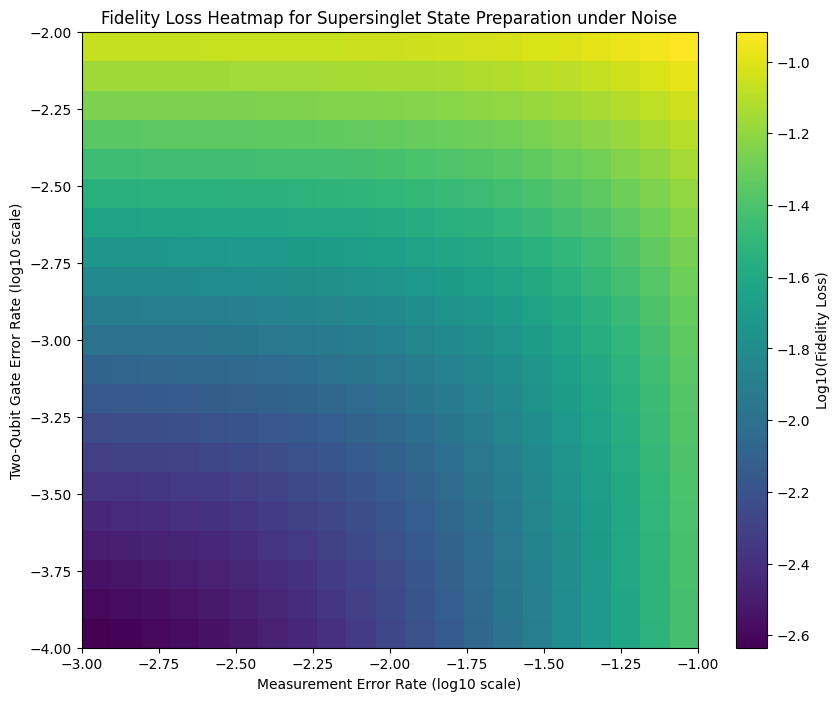

In [33]:
# plot heatmap
import matplotlib.pyplot as plt
import numpy as np

# logarithmic scale for better visualization for both axes and color scale
log_data = np.log10(np.array(data))
plt.figure(figsize=(10, 8))
plt.imshow(log_data, origin='lower', cmap='viridis', extent=[-3, -1, -4, -2])
plt.colorbar(label='Log10(Fidelity Loss)')
plt.xlabel('Measurement Error Rate (log10 scale)')
plt.ylabel('Two-Qubit Gate Error Rate (log10 scale)')
plt.title('Fidelity Loss Heatmap for Supersinglet State Preparation under Noise')
plt.show()

In [2]:
# read in the data with pickle
import pickle
with open('noisy_simulation_data.pkl', 'rb') as f:
    data = pickle.load(f)

/var/folders/d5/z46p1gs16y75dvk_xd3lphdh0000gn/T/ipykernel_93806/2492672890.py:28: UserWarning: The following kwargs were not used by contour: 'edgecolor'
  cont = plt.contourf(Xi, Yi, log_zi, levels=100, cmap='viridis', edgecolor='face')


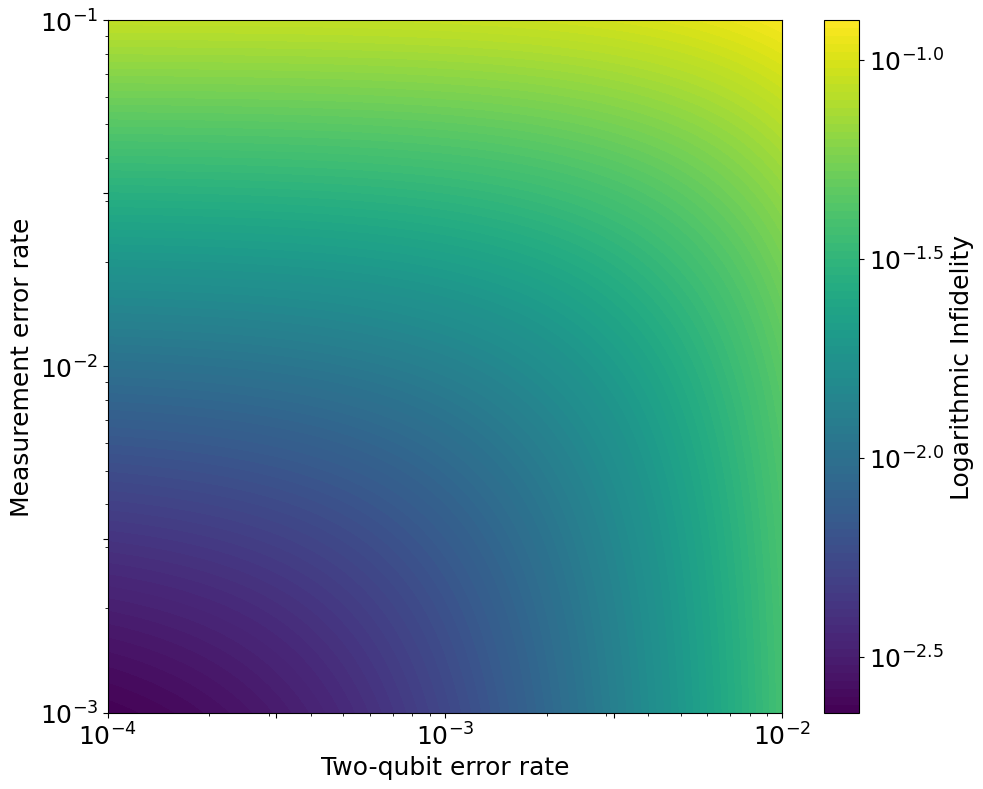

In [4]:
from matplotlib import ticker
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# 创建原始数据网格点
two_qubit_error_rates = [10 ** (-4 + 0.1 * i) for i in range(21)]
measurement_error_rates = [10 ** (-3 + 0.1 * i) for i in range(21)]

X, Y = np.meshgrid(two_qubit_error_rates, measurement_error_rates)
data = np.array(data)

# 将散点（X, Y, Z）展开为列表
x = X.flatten()
y = Y.flatten()
z = data.flatten()

# 插值：生成精细方格（100x100）用于平滑显示
xi = np.logspace(np.log10(min(two_qubit_error_rates)), np.log10(max(two_qubit_error_rates)), 100)
yi = np.logspace(np.log10(min(measurement_error_rates)), np.log10(max(measurement_error_rates)), 100)
Xi, Yi = np.meshgrid(xi, yi)

# 使用 griddata 插值
Z_interp = griddata((x, y), z, (Xi, Yi), method='cubic')
log_zi = np.log10(Z_interp)

# 绘图
plt.figure(figsize=(10, 8))
cont = plt.contourf(Xi, Yi, log_zi, levels=100, cmap='viridis', edgecolor='face')


plt.xscale('log')
plt.yscale('log')
plt.xlabel("Two-qubit error rate", fontsize=18)
plt.ylabel("Measurement error rate", fontsize=18)
plt.xticks([10**(-4), 10**(-3.5), 10**(-3), 10**(-2.5), 10**(-2)], fontsize=18)
plt.yticks([10**(-3), 10**(-2.5), 10**(-2), 10**(-1.5), 10**(-1)], fontsize=18)
plt.colorbar(cont, label="Logarithmic Infidelity", format=ticker.FuncFormatter(lambda x, pos: f"$10^{{{x:.1f}}}$"), ticks=[-2.5, -2, -1.5, -1])
# set the colorbar labels fontsize=18
cbar = plt.gcf().axes[-1]
cbar.tick_params(labelsize=18)
cbar.set_ylabel("Logarithmic Infidelity", fontsize=18)

plt.tight_layout()
plt.savefig("noisy_simulation_heatmap_4_qubit.pdf", dpi=300)

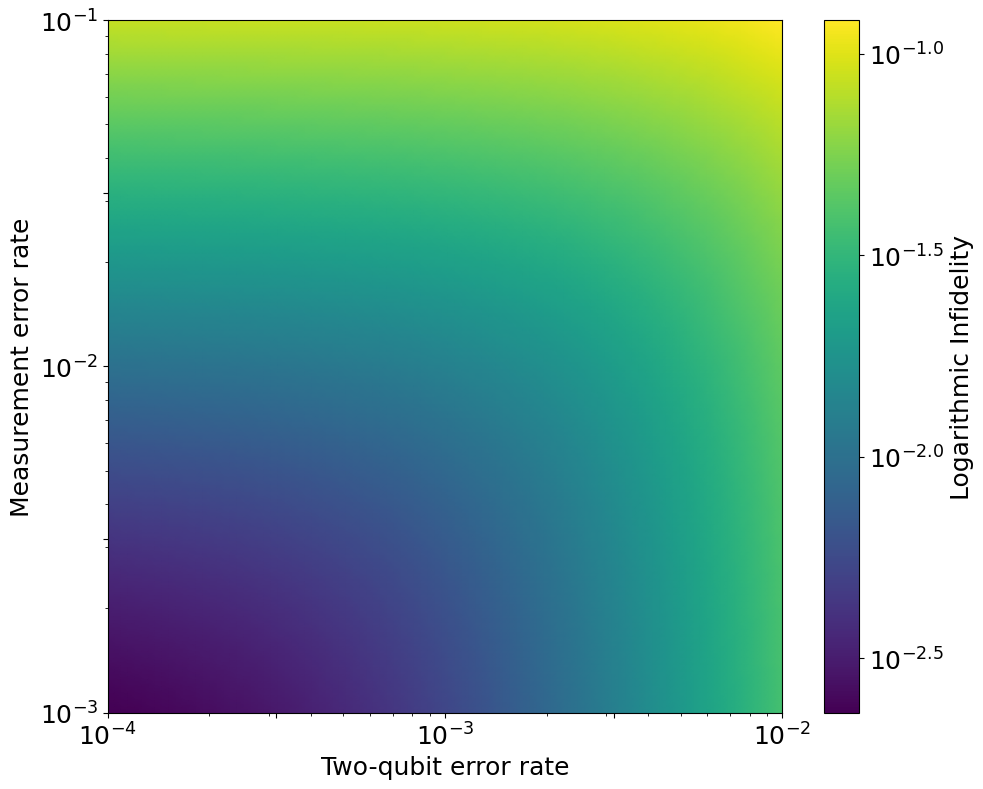

In [5]:
plt.figure(figsize=(10, 8))
# 使用 pcolormesh，确保没有线条
mesh = plt.pcolormesh(Xi, Yi, log_zi, cmap='viridis', shading='gouraud')

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Two-qubit error rate", fontsize=18)
plt.ylabel("Measurement error rate", fontsize=18)
plt.xticks([10**(-4), 10**(-3.5), 10**(-3), 10**(-2.5), 10**(-2)], fontsize=18)
plt.yticks([10**(-3), 10**(-2.5), 10**(-2), 10**(-1.5), 10**(-1)], fontsize=18)
plt.colorbar(mesh, label="Logarithmic Infidelity", format=ticker.FuncFormatter(lambda x, pos: f"$10^{{{x:.1f}}}$"), ticks=[-2.5, -2, -1.5, -1])

cbar = plt.gcf().axes[-1]
cbar.tick_params(labelsize=18)
cbar.set_ylabel("Logarithmic Infidelity", fontsize=18)

plt.tight_layout()
plt.savefig("noisy_simulation_heatmap_4_qubit_pcolormesh.pdf", dpi=300)